# Customer Churn

Model Fitness has developed a customer interaction strategy.  The goal is to determine if a customer is no longer a member of the gym.  I can calculate churn based on people who get rid of their accounts or don't renew their contracts. 


Typically, if a customer has left if they don't come for a month.  If a customer joins, comes a few times, then disappears, they're unlikely to come back.


In order to fight churn, Model Fitness has digitized a number of its customer profiles.  My task is to analyze them and come up with a customer retention strategy.

I will:
    
<b>Predict the probability of churn (for the upcoming month) for each customer</b>

<b>Draw up typical user portraits: select the most outstanding groups and describe their main features</b>
    
<b>Analyze the factors that impact churn most</b>

<b>Draw basic conclusions and develop recommendations on how to improve customer service:</b>
    
- Identify target groups

- Suggest measures to cut churn

- Describe any other patterns you see with respect to interaction with customers

## Download the Data

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#download the dataset
data = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
# change all column names to lowercase
data.columns = data.columns.str.lower()
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


To make my coding easier, I made the column names in lowercase.

## EDA

<b>Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).</b>

In [4]:
#check for missing values
data.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [5]:
#check for duplicates
data.duplicated().sum()

0

The dataset does not have missing values

In [6]:
#study the mean and std 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


This doesn't help with my analysis, I need to seperate the churned from unchurned to see which features impact membership


<b>Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).</b>

In [7]:
#group the data by the churn rate and apply the mean
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


This table seperates churned and non-churned, we can see:


- Gender does not contribute to churn rate
- Location does impact churn rate, less likely to churn if you live close
- Going with a partner decreases churn rate
- Less people churned after friend promo
- Having a phone# on file doesn't impact churn 
- Having a longer contract significantly decreases churn
- Group workouts retain more members
- A members age does not impact churn 
- Higher additional charges for members who don't churn 
- A longer contract decreases churn
- A shorter lifetime inrecreases churn
- Attending 2 or more classes decerases churn

<b>Plot bar histograms and feature distributions for those who left (churn) and those who stayed. </b>

<b>First plot histograms: </b>

In [8]:
#query two groups: members and churned
churned= data.query('churn==1')
members= data.query('churn==0')

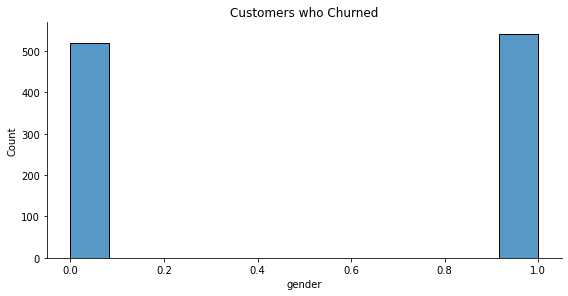

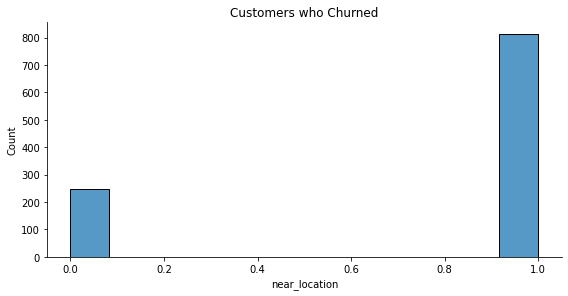

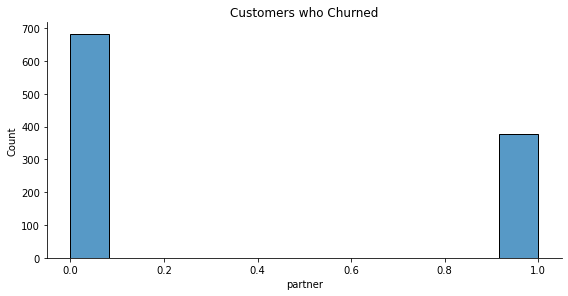

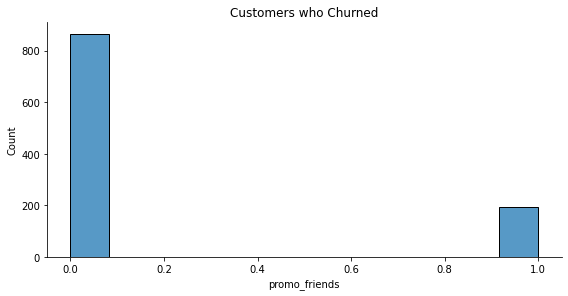

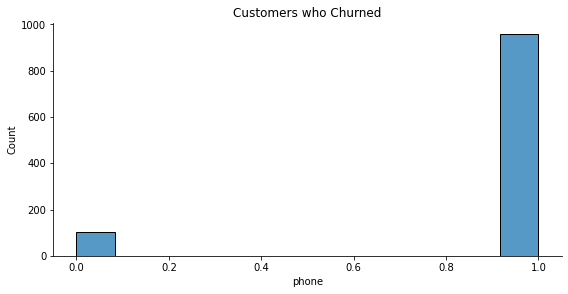

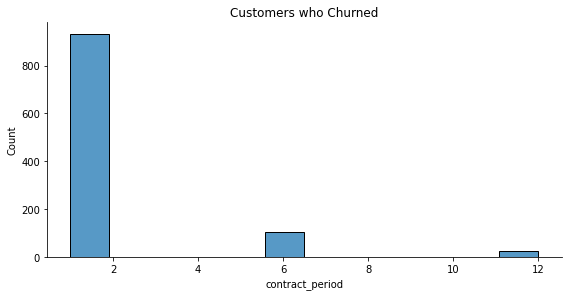

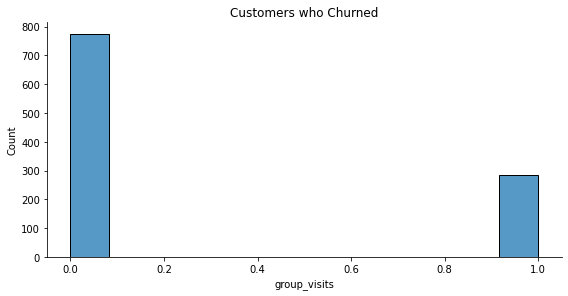

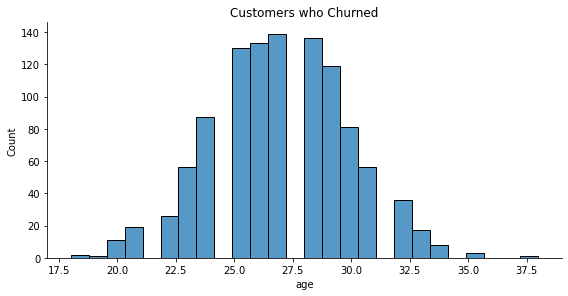

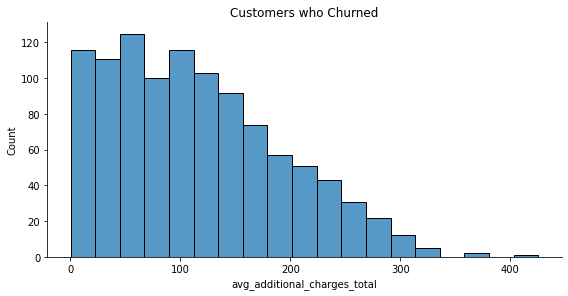

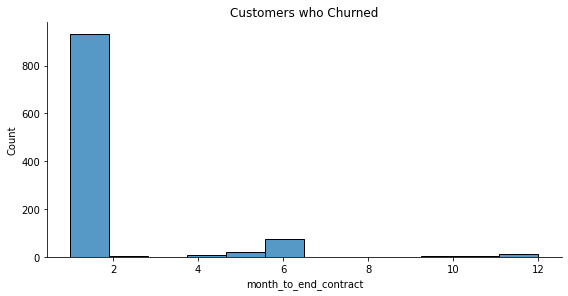

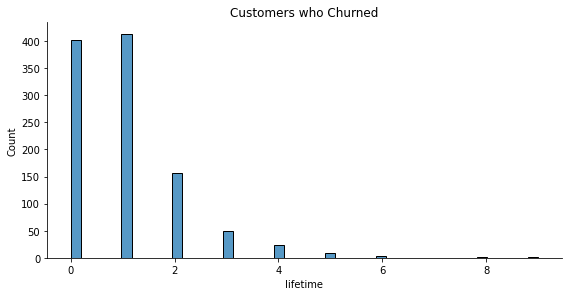

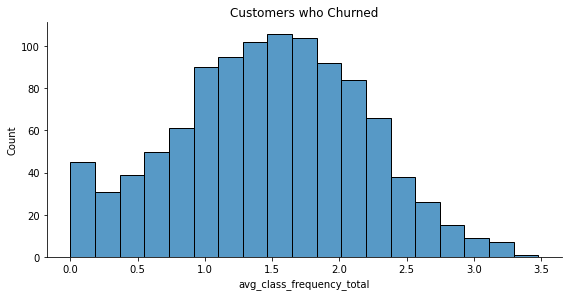

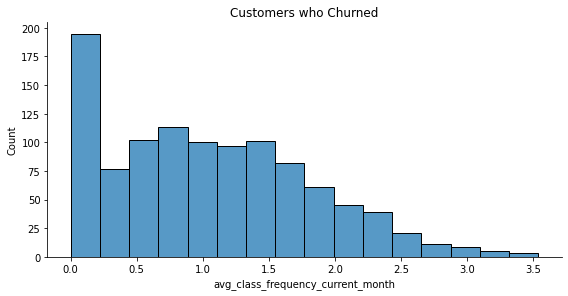

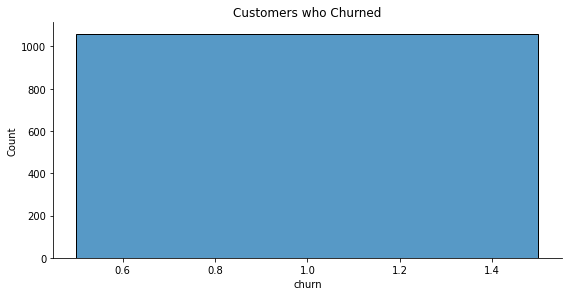

In [9]:
#create loop: churn for each feature 
for i in churned.columns:
    sns.displot(data= churned, x= i, height= 4, aspect= 2)
    plt.title('Customers who Churned')

Do the same for loop for members

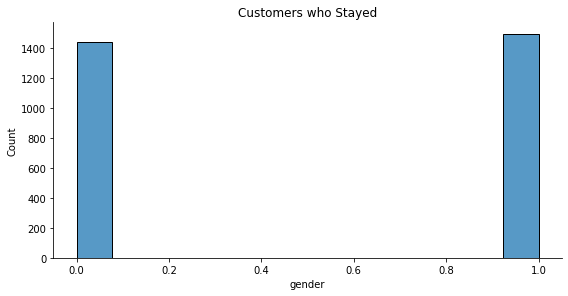

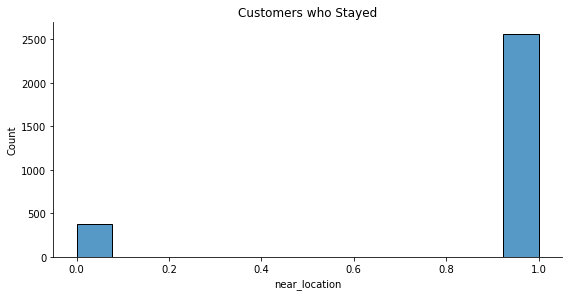

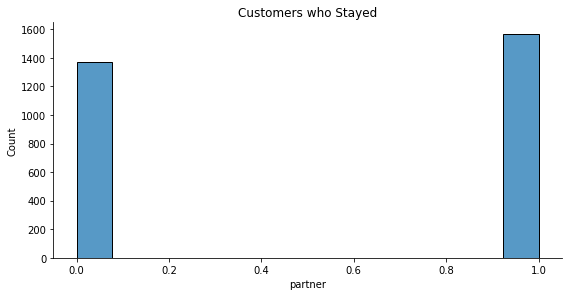

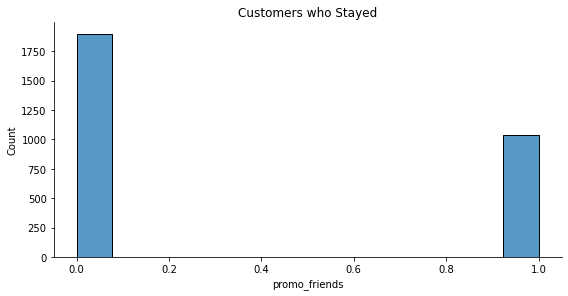

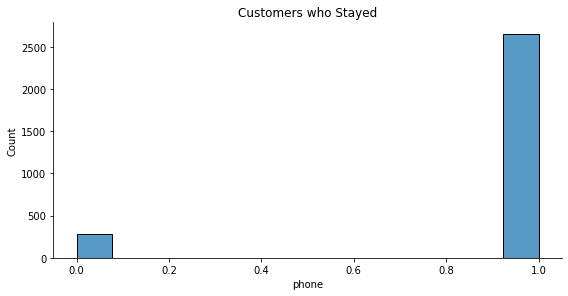

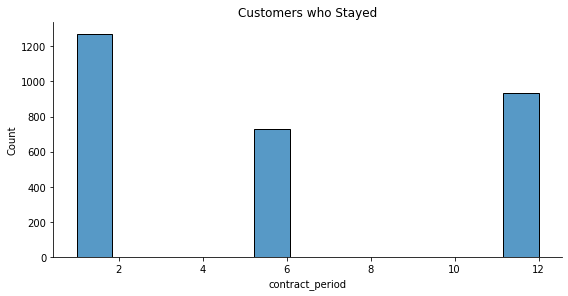

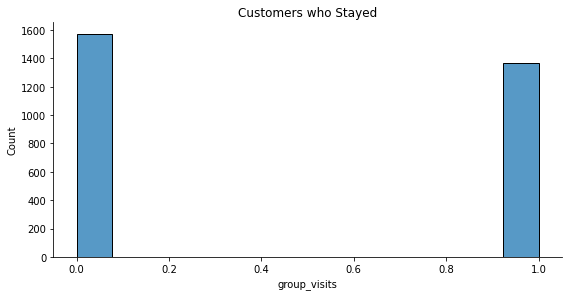

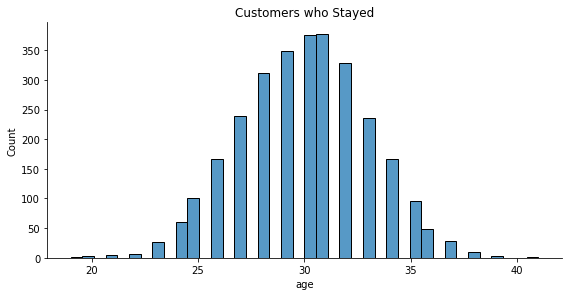

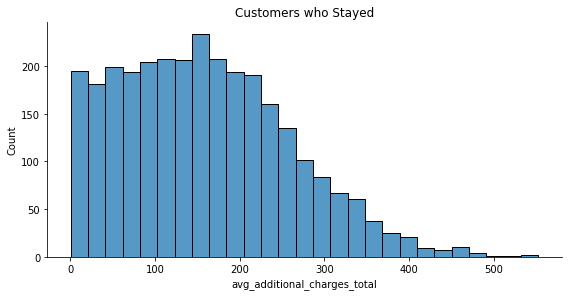

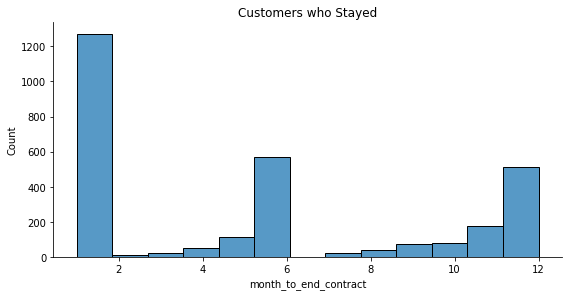

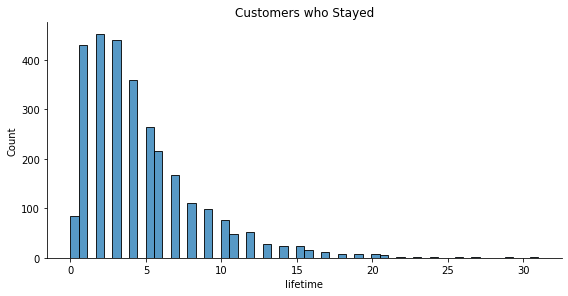

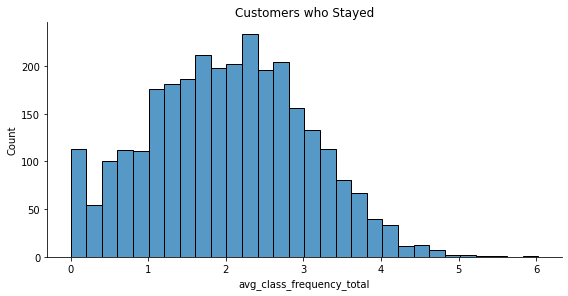

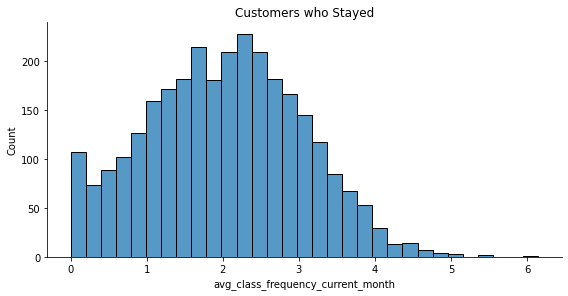

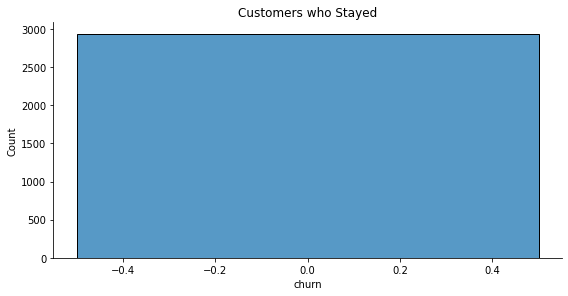

In [10]:
#create loop for members
for i in members.columns:
    sns.displot(data= members, x= i, height= 4, aspect= 2)
    plt.title('Customers who Stayed')

There are roughly 1000 people who churned. If you study the graphs, you can visulaize the significance each feature has on churn rate:
- Gender: churners are even among gender 50/50
- Location: churners live close to the gym 75/25
- Partner: churners are not partners 35/65
- Promotion: churners didn't do friend promo 20/80
- Phone#: churners have a phone# on file 90/10
- TOTAL Contract: people churned when contract <2 months 85/10/5
- Group: churners didn't do group workout 25/75
- Age: churners below 25 and above 30 churn significantly
- Charges: as chargres increase, churn rate decreases
- LEFT ON Contract: people churned last month of contract 
- Lifetime: churners are members less than 2 months
- TOTAL Class: churners did a total of <=1 class
- MONTHLY Class: churners didn't do many classes

Roughly 3000 members who did NOT churn. The graph is a visual of each feature for members:
 - Gender: is generally equal
 - Location: most members live close
 - Partner: roughly half of members are partner
 - Promo: members didn't use friend promo often
 - Phone#: majority of member have cell on file
 - Total Contract: compared to churned, members have more contracts longer than two months. but still, mostly 1-2 month contracts
 - Groups: half of members did group visits
 - Age: 30 is the sweet spoy
 - Charges:members have slightly more charges, compared to churners
 - Left on Contract: more members have 6 or 12 months left, compared to churners
 - Lifetime: most members have 2-4 months for lifetime
 - TOTAL Class: members are likely to try 2-3 classes
 - CURRENT Class: many members did 2 classes this month

In order to determine which feature has the largest impact, compare graphs. If members and churners have similar graphs, that feature does not impact churn rate(for example, gender). 

The main difference is members are typically partners, can have longer contracts, participate in group work, have more additional charges, and attend more classes.

 <b>Now do the feature distribution:</b>

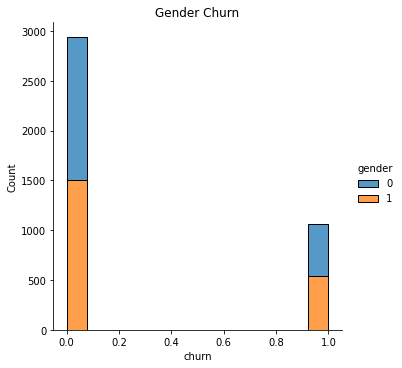

In [11]:
#stacked bar
sns.displot(data=data,x="churn",hue="gender",multiple="stack")
plt.title("Gender Churn");

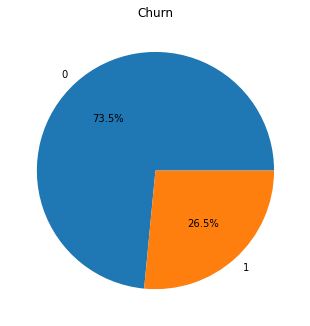

In [12]:
# Pie chart
sizes = data['churn'].value_counts(sort = True)
labels = np.unique(data.churn)


plt.figure(figsize = (12,12))
plt.subplot(212)
plt.title("Churn")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

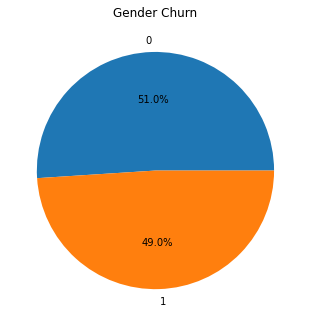

In [13]:
# Pie chart gender
sizes = data['gender'].value_counts(sort = True)
labels = np.unique(data.churn)

# Visualize the data
plt.figure(figsize = (12,12))
plt.subplot(212)
plt.title("Gender Churn")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

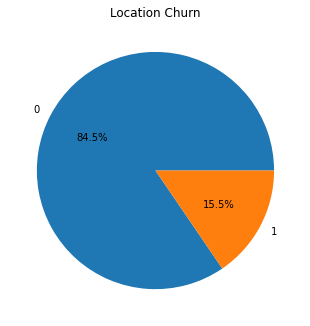

In [14]:
# Pie Chart location
sizes = data['near_location'].value_counts(sort = True)
labels = np.unique(data.churn)

# Visualize the data
plt.figure(figsize = (12,12))
plt.subplot(212)
plt.title("Location Churn")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

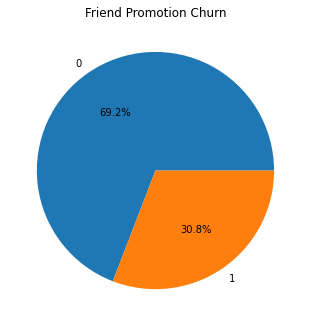

In [15]:
# Pie chart promo
sizes = data['promo_friends'].value_counts(sort = True)
labels = np.unique(data.churn)

# Visualize the data
plt.figure(figsize = (12,12))
plt.subplot(212)
plt.title("Friend Promotion Churn")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

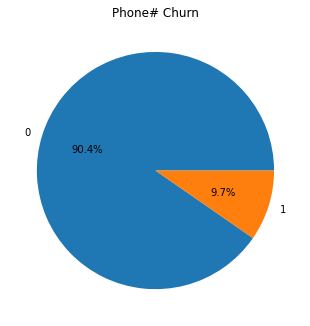

In [16]:
# Pie chart phone#
sizes = data['phone'].value_counts(sort = True)
labels = np.unique(data.churn)

# Visualize the data
plt.figure(figsize = (12,12))
plt.subplot(212)
plt.title("Phone# Churn")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

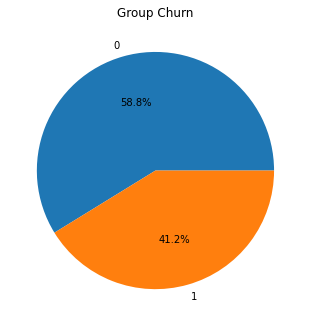

In [17]:
# Pie chart group visit
sizes = data['group_visits'].value_counts(sort = True)
labels = np.unique(data.churn)

# Visualize the data
plt.figure(figsize = (12,12))
plt.subplot(212)
plt.title("Group Churn")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

<b>Now we make a correlation Matrix</b>

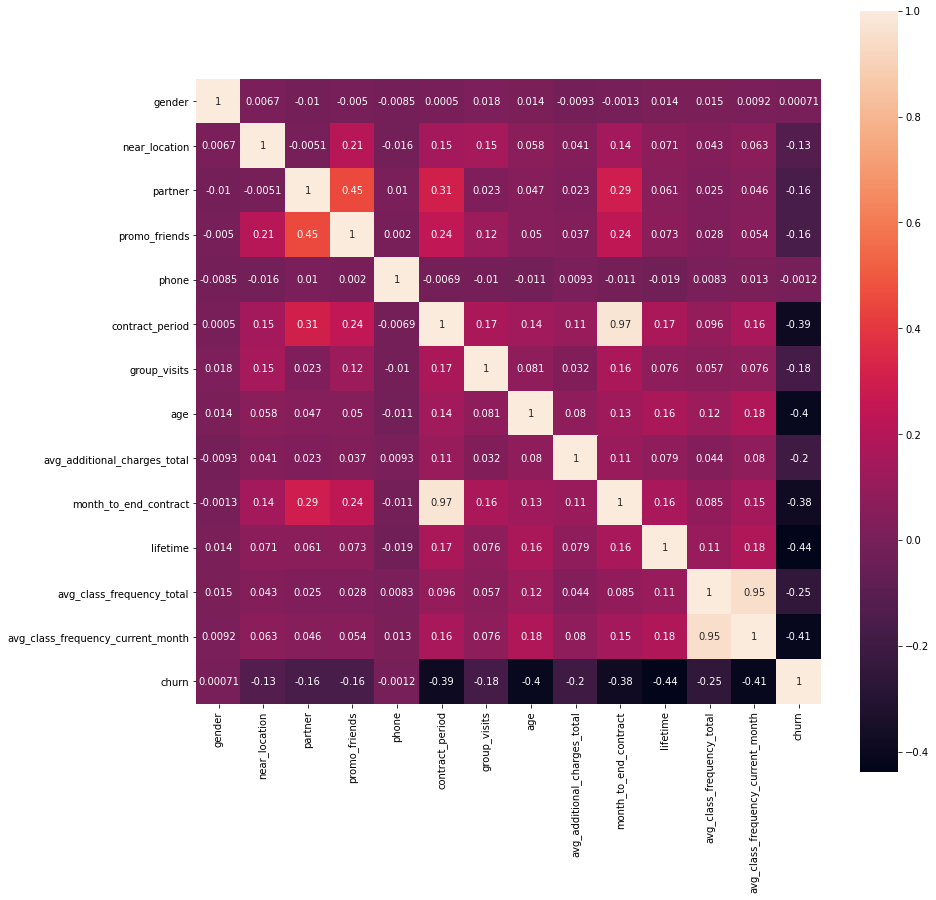

In [18]:
#building a correlation matrix for gym churn
corr_matrix = data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True, square=True)
plt.show();

Churn has a week correlation for all features: values are negative and close to 0...A value close to 1.0 means the two features have high correlation, and its positive. The features with high corrlations are:

- contract period & month to end contract
- total classes & monthly classes


## Build a model to predict user churn

<b>Divide the data into train and validation sets using the train_test_split() function.</b>

In [19]:
#divide the churn column (y is target)
X = data.drop('churn', axis=1)
y = data['churn']

# use train_test_split & random_state divide train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
#apply scaler
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# logistic algorithm
model = LogisticRegression(random_state=0)

# train
model.fit(X_train_st, y_train)

# predict
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test)

#print accuracy, precision, recall
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))


Accuracy: 0.92
Precision: 0.85
Recall: 0.83


In [20]:
# do for radom forest
model = RandomForestClassifier(random_state=0)

# train
model.fit(X_train_st, y_train)

#predict
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)

#print accuracy, precision, and recall
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.81


I can see that using the logistic method produces higher percentage of precision and recall. 

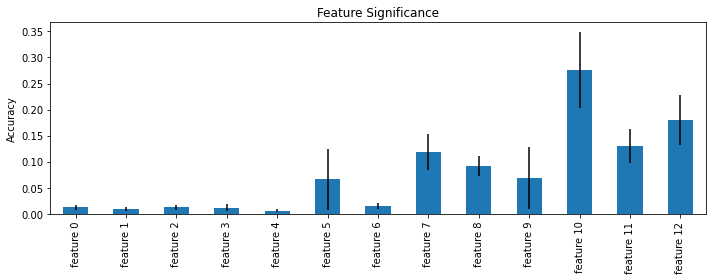

In [21]:
#apply random forest
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_st, y_train)

#find the standard deviation for the feature importances
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)


forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize=(10, 4))
ax.set_title("Feature Significance")
ax.set_ylabel("Accuracy")
fig.tight_layout()

We can determine a feature's significance based the level of accuracy in the visual above. Feature 10 represents how long someone has had a membership. I can determine that longer contracts decrease churn rates

In [22]:
#model for Logistic 
model_LR = LogisticRegression(random_state=0)
model_LR.fit(X_train_st,y_train)

#model for random forest
model_RFC = RandomForestClassifier(random_state=0,n_estimators=100)
model_RFC.fit(X_train_st,y_train)

RandomForestClassifier(random_state=0)

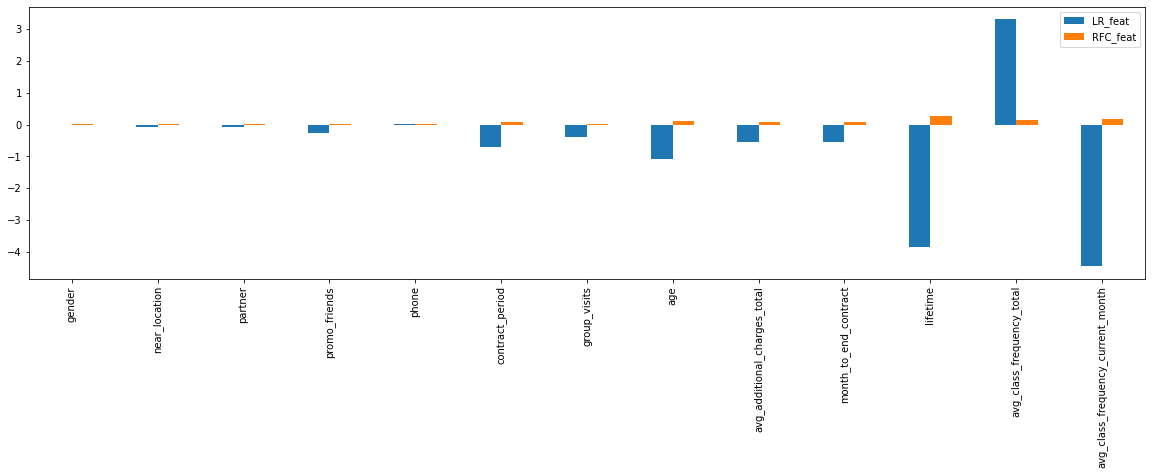

In [23]:
data_ = {'LR_feat':model_LR.coef_[0],'RFC_feat':model_RFC.feature_importances_}
features = pd.DataFrame(data=data_,index=X.columns)
features.plot(kind='bar',figsize=(20,5))
plt.show()

## Create user clusters

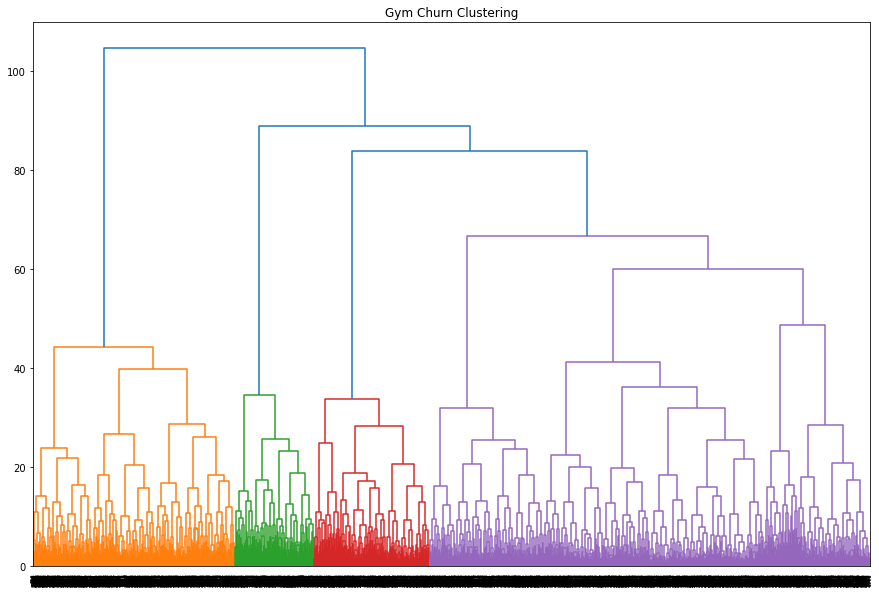

In [24]:
# creating a scaler class object (normalizer)
scaler = StandardScaler() 

# training the normalizer and transforming the dataset
x_sc = scaler.fit_transform(data.drop(columns = ['churn'])) 

linked = linkage(x_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Gym Churn Clustering')
plt.show() 

In [25]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5)

# predict the clusters for observations
labels = km.fit_predict(x_sc)

# store cluster labels in the field of our dataset
data['cluster_km'] = labels

# get the statistics of the mean feature values per cluster
mean_values = data.groupby(['cluster_km']).mean()

mean_values.transpose()

cluster_km,0,1,2,3,4
gender,0.500577,0.495987,0.481659,0.565517,0.523316
near_location,0.936563,0.948636,0.724083,0.847126,0.862694
partner,0.740484,0.818620,0.294258,0.280460,0.471503
promo_friends,0.480969,0.998395,0.013557,0.068966,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,11.833910,3.033708,1.918660,2.672414,4.777202
group_visits,0.547866,0.438202,0.275917,0.448276,0.427461
age,29.891580,29.078652,28.120415,30.037931,29.297927
avg_additional_charges_total,163.330735,140.796508,129.707818,161.072390,144.208179
month_to_end_contract,10.791234,2.839486,1.825359,2.474713,4.466321


<b> What features have a moderate to high impact on churn rate? </b>
- partner
- contract period
- month to end 

<b> What features have little impact on churn rate? </b>
- promo
- group visits
- additional charges
- lifetime

<b> What features have no impact on churn rate? </b>
- gender
- age
- near location
- phone
- class total
- class per month

In [26]:
churn = data.groupby(['cluster_km']).agg({'gender':'count', 'churn':'sum'})
churn = churn.rename(columns={
    'gender': 'number_of_members', 
    'churn': 'churn_count'})

churn['churn_rate_percentage']= churn['churn_count']/ churn['number_of_members']*100
churn

,number_of_members,churn_count,churn_rate_percentage
cluster_km,,,
0,867,19,2.191465
1,623,161,25.842697
2,1254,707,56.379585
3,870,71,8.160920
4,386,103,26.683938


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


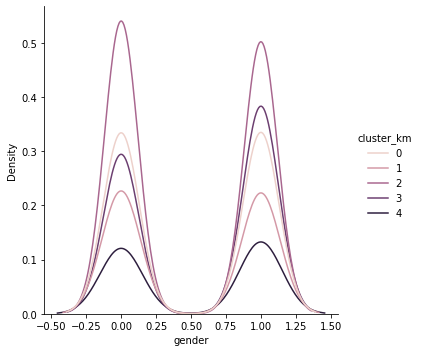

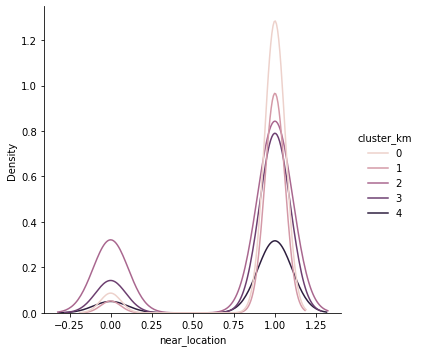

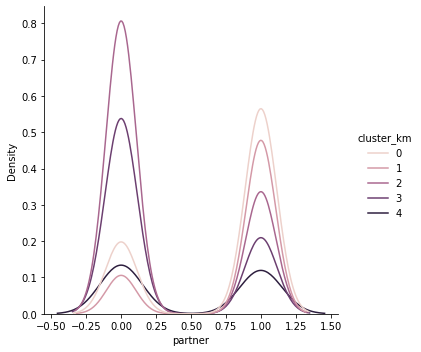

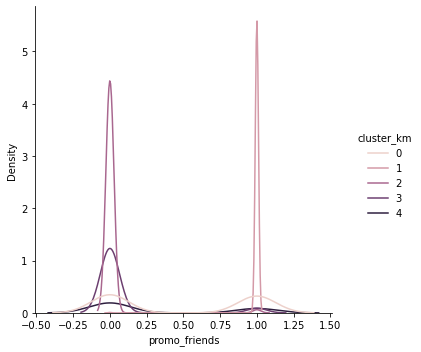

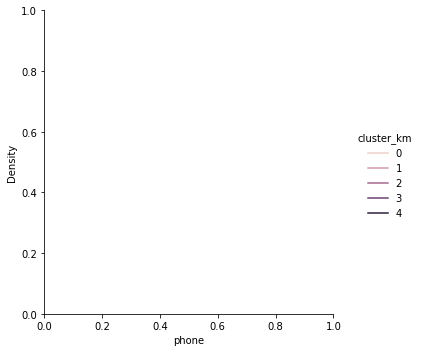

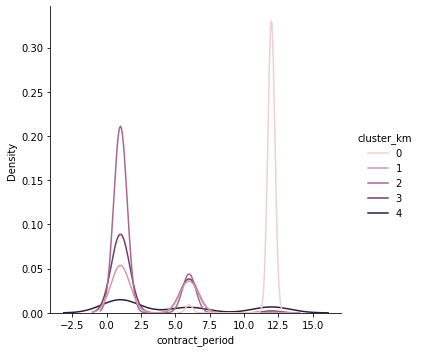

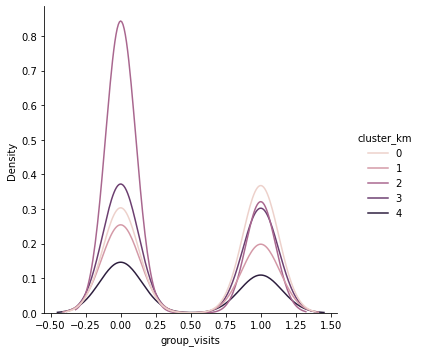

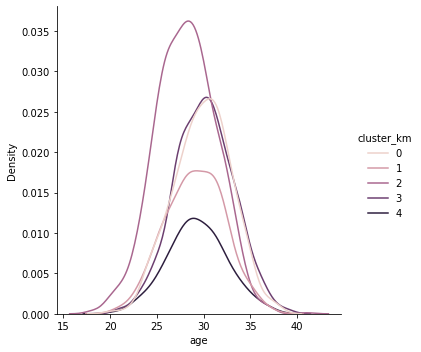

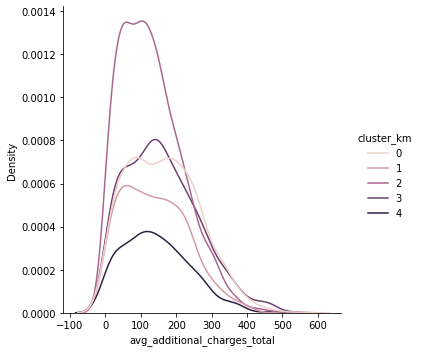

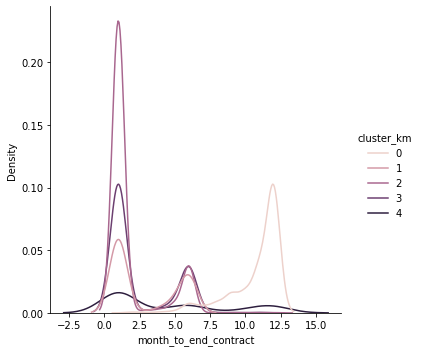

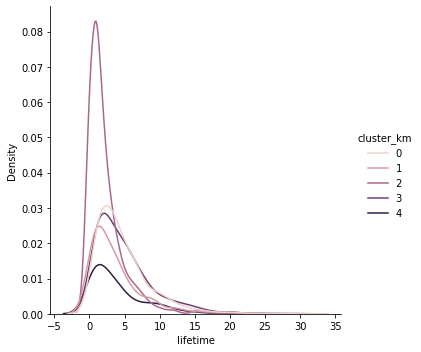

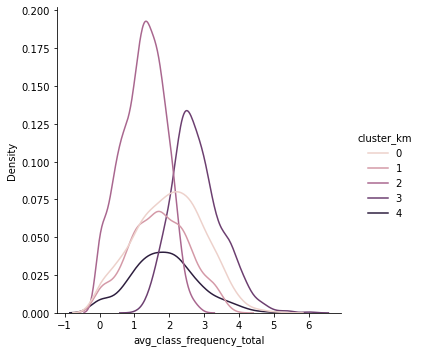

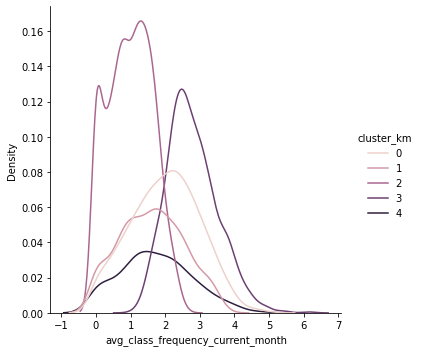

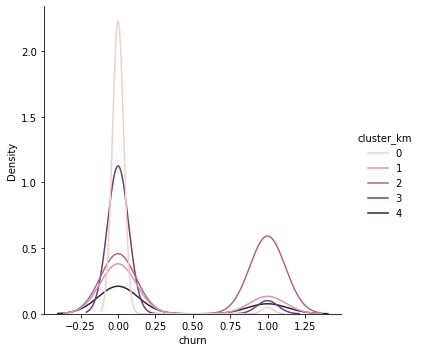

In [27]:
clust_0= data.query('cluster_km==0')
clust_1= data.query('cluster_km==1')
clust_2= data.query('cluster_km==2')
clust_3= data.query('cluster_km==3')
clust_4= data.query('cluster_km==4')

sns.displot(data= data, x= 'gender', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= data, x= 'near_location', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= data, x= 'partner', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= data, x= 'promo_friends', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= data, x= 'phone', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= data, x= 'contract_period', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= data, x= 'group_visits', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= data, x= 'age', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= data, x= 'avg_additional_charges_total', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= data, x= 'month_to_end_contract', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= data, x= 'lifetime', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= data, x= 'avg_class_frequency_total', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= data, x= 'avg_class_frequency_current_month', hue= 'cluster_km',kind= 'kde', legend= True)
sns.displot(data= data, x= 'churn', hue= 'cluster_km',kind= 'kde', legend= True)

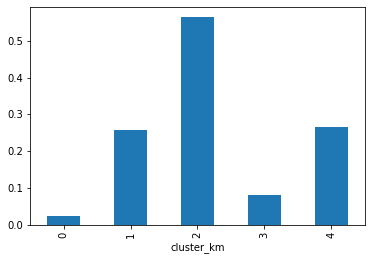

In [30]:
clust_churn = data.groupby('cluster_km')['churn'].mean().plot.bar()
clust_churn;

## Conclusion

My task was to find a customer retention strategy for Model Fitness. I evaluted customer profiles to find which features impact churn rate. The first step was to import the approproate libraries and download the dataframe. I studied the contents before performing EDA.

I found no missing values or duplicates. In a new table, I split the current "members" from the "churners" - and I studied the mean values across all features. For visual presentation, I made a histogram showing members vs. churners for each feature. Another visual reference provided is a heatmap showing correrlation of each (feature : churn) 
    
My next task was making a model to predict the user churn. I made validation sets, and trained the model on two methods to determine the best. I evaluated accuracy, precision, and recall for both models and compare them. The Logistic Regression was my choice. 

The final task in the customer retention strategy was to create clusters. After I strandarized the data, I used the linkage() function to build a matrix of distances based on the standardized feature matrix to plot a dendrogram. Then I trained the model with the K-means algorithm to predict clusters. To make conclusions and recommendations, I looked at the mean feature values for clusters. For visual confirmation, plotted the  distributions of features for the clusters. Finally, I calculated the churn rate for each cluster.

## Recommendations 

<b>GOAL ONE : Identify target groups</b>

The target groups have the lowest churn rate. <b>I suggest our target groups are cluster 1 & 3</b> 

<b>GOAL TWO : Suggest measures to cut churn</b>

Some features have a lower impact on churn overall, however they perform slightly higher in our target groups. We know that are partners with long contracts & contract period left are signifcant. We can also foucus on features that correlate.  It's possible if we increase promotions, group visits, additional charges, and lifetime - we can secure more members. 

1. The gym could do a promotion for referrals. One month free for the current member, in exchange for a new member(a friend who writes them down as referral) signing a 6 mo contract. This combines promo+group visits+contract length.

2. The gym could provide more perks that are additional charges. A spa(massage, facials, sauna, steam room), VIP lounge(juice bar, aromatherapy, nutrition consulation)

3. A loyalty program could increase lifetime. Perhaps members get points for each workout, points can be cashed in for free perks. 

<b>GOAL THREE: Describe any other patterns you see with respect to interaction with customers</b>

Members who have <b>many months remaining on their contract</b>, and are <b>partners</b>, with <b>long contract periods</b>,  have the lowest churn rate. These are the main features thay contribute to the success of membership. I know that partner contracts are offered at a lower price, this seems to motivate members to choose our gym over the compeition. Members with longer contracts, and a lot of time remaining on those contracts, could be considered more committed to membership. 

We need not focus on a specific gender, nor a specific age. These features have little to no impact on churn. Collecting the phone number is useful for business purposes, but does not impact churn. 